1- Cargar bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import os
from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_grouped_histograms
from sklearn.model_selection import train_test_split

2- Obtener datos

In [2]:
ruta= "./src/data_sample/ventas/"

archivos_alquiler= list(os.listdir(ruta))
print(archivos_alquiler)
dfs={}

for fichero in archivos_alquiler:
    nombre_df= fichero
    ruta_fichero= ruta+fichero
    df= pd.read_csv(ruta_fichero)
    dfs[fichero]= df
df_total_ventas= pd.concat(dfs.values(), ignore_index=True)

print(len(df_total_ventas))
df_total_ventas

['v_abril_2025.csv', 'v_agosto_2025.csv', 'v_diciembre_2025.csv', 'v_enero_2025.csv', 'v_febrero_2025.csv', 'v_julio_2025.csv', 'v_junio_2025.csv', 'v_marzo_2025.csv', 'v_mayo_2025.csv', 'v_noviembre_2025.csv', 'v_octubre_2025.csv', 'v_septiembre_2025.csv']
24000


,Fuente,Referencia,Operación,Tipología,Título,C.P.,Municipio,Provincia,Distrito,Barrio,...,Descartado,Estado,Ranking,Dormitorios,Baños,Superficie,Precio,Precio unitario,Días,Demanda
0,Fotocasa,0292687,Venta,Plurifamiliar,Piso en Venta en Arrancapins,46007.0,Valencia,Valencia,Extramurs,Arrancapins,...,No,No contactado,9421,4.0,2.0,129,530000,4108,1,Muy baja
1,habitaclia,2629,Venta,Plurifamiliar,Vive la Valencia más auténtica en esta joya e...,NaN,Valencia,Valencia,La Saïdia,Sant Antoni,...,No,No contactado,4728,1.0,1.0,78,250000,3205,1,Muy baja
2,milanuncios,542365647,Venta,Plurifamiliar,Valencia Capital,46009.0,Valencia,Valencia,La Saïdia,Sant Antoni,...,No,No contactado,3671,1.0,1.0,78,250000,3205,1,Muy baja
3,Fotocasa,25VIV06586,Venta,Plurifamiliar,"Piso en Venta en PADRE PEDRO VELASCO, 5, La M...",46011.0,Valencia,Valencia,Poblats Marítims,La Malva-rosa,...,No,No contactado,280,3.0,1.0,64,58500,914,1,Alta
4,habitaclia,25VIV06586,Venta,Plurifamiliar,NaN,NaN,Valencia,Valencia,Poblats Marítims,La Malva-rosa,...,No,No contactado,10154,3.0,1.0,64,58500,914,1,Muy baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,habitaclia,64-03483,Venta,Plurifamiliar,Venta piso en Valencia,NaN,Valencia,Valencia,Quatre Carreres,La Punta,...,No,No contactado,345,4.0,1.0,100,165000,1650,3,Alta
23996,milanuncios,557691756,Venta,Plurifamiliar,Valencia Capital,46007.0,Valencia,Valencia,Jesús,La Raïosa,...,No,No contactado,43,3.0,2.0,101,315000,3118,17,Muy alta
23997,milanuncios,557632670,Venta,Plurifamiliar,Barrio del Carmen - Carrer de Pinzón,46003.0,Valencia,Valencia,Ciutat Vella,El Carme,...,No,No contactado,6241,3.0,2.0,87,349900,4021,17,Muy baja
23998,habitaclia,LCV37757-1,Venta,Plurifamiliar,NaN,NaN,Valencia,Valencia,Poblats Marítims,El Grau,...,No,No contactado,5419,3.0,2.0,111,330000,2972,17,Muy baja


In [3]:
df.head()

,Fuente,Referencia,Operación,Tipología,Título,C.P.,Municipio,Provincia,Distrito,Barrio,...,Descartado,Estado,Ranking,Dormitorios,Baños,Superficie,Precio,Precio unitario,Días,Demanda
0,Fotocasa,NaN,Venta,Plurifamiliar,Piso en Venta en Carrer de Sant Joan de la Pe...,46019.0,Valencia,Valencia,Rascanya,Orriols,...,No,No contactado,794,2.0,1.0,70,159000,2271,1,Moderada
1,milanuncios,560093044,Venta,Plurifamiliar,Orriols,46019.0,Valencia,Valencia,Rascanya,Orriols,...,No,No contactado,6555,2.0,1.0,70,159000,2271,1,Muy baja
2,Fotocasa,NaN,Venta,Plurifamiliar,Piso en Venta en Els Orriols,46001.0,Valencia,Valencia,Rascanya,Orriols,...,No,No contactado,6,2.0,1.0,70,159000,2271,1,Muy alta
3,milanuncios,560092256,Venta,Plurifamiliar,Barrio Benicalap - Carrer de Benicadell,46015.0,Valencia,Valencia,Benicalap,Barrio de Benicalap,...,No,No contactado,8070,3.0,1.0,72,180000,2500,1,Muy baja
4,Fotocasa,NaN,Venta,Plurifamiliar,Piso en Venta en Carrer de Sant Joan de la Pe...,46019.0,Valencia,Valencia,Rascanya,Orriols,...,No,No contactado,801,2.0,1.0,70,159000,2271,1,Moderada


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fuente              2000 non-null   object 
 1   Referencia          1953 non-null   object 
 2   Operación           2000 non-null   object 
 3   Tipología           2000 non-null   object 
 4   Título              1847 non-null   object 
 5   C.P.                1347 non-null   float64
 6   Municipio           2000 non-null   object 
 7   Provincia           2000 non-null   object 
 8   Distrito            2000 non-null   object 
 9   Barrio              1857 non-null   object 
 10  Latitud             2000 non-null   float64
 11  Longitud            2000 non-null   float64
 12  Planta              1673 non-null   object 
 13  Anunciante          2000 non-null   object 
 14  Empresa             1961 non-null   object 
 15  Aire acondicionado  2000 non-null   object 
 16  Ascens

In [5]:
# nulos
# print(df.isnull().sum()/len(df)*100)
# creando el indice de referencia
df["Referencia_interna"]= df["Latitud"].astype(str).replace(".","")+ df["Longitud"].astype(str).replace(".","")
df["Referencia_interna"]

0              39.4954428-0.369104
1       39.4940903323-0.3710177677
2       39.4942298986-0.3708782014
3             39.4908707-0.3943799
4              39.4954428-0.369104
                   ...            
1995    39.4468009423-0.3370047397
1996    39.4543412456-0.3901562521
1997          39.4774322-0.3824911
1998    39.4584919581-0.3339615419
1999          39.4955381-0.3703577
Name: Referencia_interna, Length: 2000, dtype: object

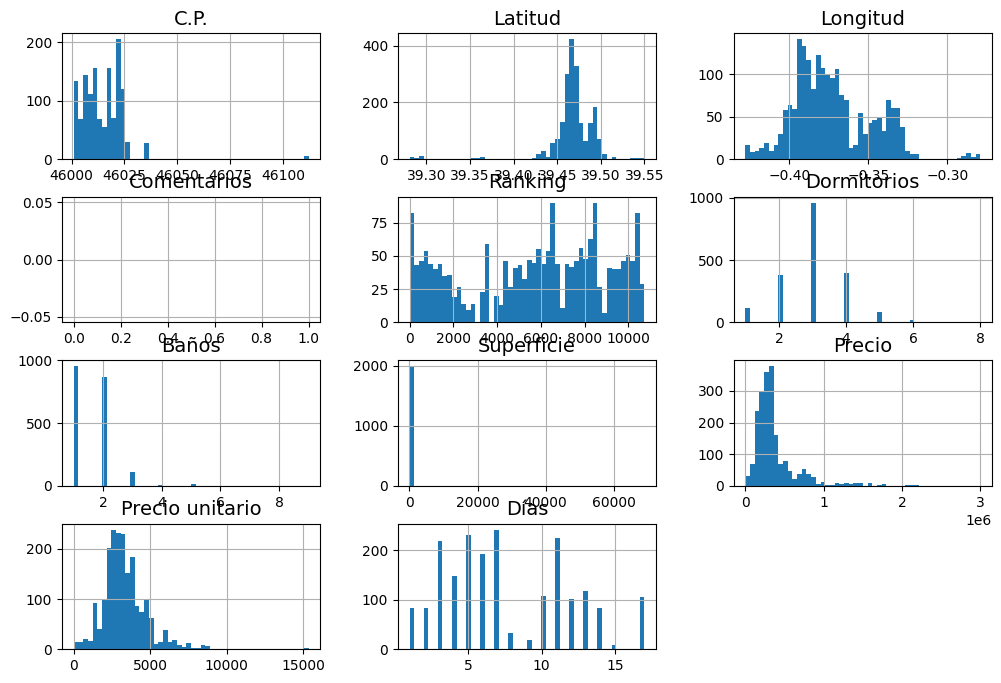

In [6]:
# Código extra para los tamaños de las fuentes y los "ticks" de los ejes, esto no lo vimos al hablar de matplotlib así que una extra
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

3- Separar Train y test

In [7]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
len(train_set)

1600

In [9]:
len(test_set)

400

4 - Proceso de "EDA"

In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 968 to 1126
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fuente              1600 non-null   object 
 1   Referencia          1565 non-null   object 
 2   Operación           1600 non-null   object 
 3   Tipología           1600 non-null   object 
 4   Título              1473 non-null   object 
 5   C.P.                1068 non-null   float64
 6   Municipio           1600 non-null   object 
 7   Provincia           1600 non-null   object 
 8   Distrito            1600 non-null   object 
 9   Barrio              1486 non-null   object 
 10  Latitud             1600 non-null   float64
 11  Longitud            1600 non-null   float64
 12  Planta              1336 non-null   object 
 13  Anunciante          1600 non-null   object 
 14  Empresa             1568 non-null   object 
 15  Aire acondicionado  1600 non-null   object 
 16  Ascensor 

In [11]:
# Eliminar duplicados
train_set = train_set.sort_values(by='Precio')
train_set = train_set.drop_duplicates(subset=['Referencia_interna', 'Operación'])

train_set["Referencia_interna"].nunique()
train_set.nunique()
len(train_set)
train_set

,Fuente,Referencia,Operación,Tipología,Título,C.P.,Municipio,Provincia,Distrito,Barrio,...,Estado,Ranking,Dormitorios,Baños,Superficie,Precio,Precio unitario,Días,Demanda,Referencia_interna
737,habitaclia,RTQ_PILAR_1_copia,Venta,Plurifamiliar,PISO CON PLAZA DE APARCAMIENTO EN ALQUILER EN ...,NaN,Valencia,Valencia,Ciutat Vella,El Pilar,...,No contactado,4905,2.0,1.0,82,1200,14,1,Muy baja,39.4717781113-0.3823677887
1844,Fotocasa,KB-01587-0001,Venta,Plurifamiliar,"Piso en Venta en C/ Joaquín Navarro, L'Hort d...",46017.0,Valencia,Valencia,Jesús,L'Hort de Senabre,...,No contactado,1183,NaN,NaN,136,9500,69,14,Alta,39.4526921899-0.3853477101
1843,milanuncios,557948106,Venta,Plurifamiliar,Valencia Capital,46017.0,Valencia,Valencia,Jesús,L'Hort de Senabre,...,No contactado,9996,NaN,NaN,136,9500,69,14,Muy baja,39.4512664323-0.3867734677
1780,habitaclia,KB-01587-0001,Venta,Plurifamiliar,Solvia Inmobiliaria Piso Valencia,NaN,Valencia,Valencia,Jesús,L'Hort de Senabre,...,No contactado,7022,NaN,NaN,136,9500,69,14,Muy baja,39.4529359581-0.3851039419
1752,Fotocasa,NaN,Venta,Unifamiliar,Casa-Chalet en Venta en Nou Campanar,46001.0,Valencia,Valencia,Campanar,Sant Pau - Zona Palau de Congresos - Nou Campanar,...,No contactado,2766,3.0,1.0,60,20000,333,14,Moderada,39.4772224986-0.4045243014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,habitaclia,VV2208034,Venta,Plurifamiliar,Piso en venta en Calle Colón,NaN,Valencia,Valencia,L'Eixample,El Pla del Remei,...,No contactado,7190,4.0,3.0,366,2125000,5806,7,Muy baja,39.4690008581-0.3718981419
921,milanuncios,559079046,Venta,Plurifamiliar,Valencia Capital,46004.0,Valencia,Valencia,L'Eixample,El Pla del Remei,...,No contactado,10022,4.0,3.0,366,2125000,5806,7,Muy baja,39.4673313323-0.3735676677
940,Fotocasa,VAL62213,Venta,Unifamiliar,Casa-Chalet en Venta en Jaume Roig,46010.0,Valencia,Valencia,El Pla del Real,Jaume Roig,...,No contactado,10522,5.0,5.0,290,2200000,7586,7,Muy baja,39.4786108986-0.3665091014
844,milanuncios,559076785,Venta,Unifamiliar,Valencia Capital,46010.0,Valencia,Valencia,El Pla del Real,Jaume Roig,...,No contactado,10265,5.0,5.0,290,2200000,7586,7,Muy baja,39.4784713323-0.3666486677


In [12]:
# Columnas a eliminar: Tipologia, Titulo, provincia , municipio, C.P, planta, Empresa, imagen, URL, Teléfono, email, posible agencia, comentarios, descartado, Estado, Ranking, Dias
columnas_a_eliminar=[
    "Tipología", "Título", "Provincia", "Municipio", "C.P.", 
    "Planta", "Empresa", "Imagen", "URL", "Teléfono", 
    "Email", "Posible agencia", "Referencia", "Operación", "Fecha de creación", 
    "Comentarios", "Descartado","Estado", "Ranking", "Días","Conservación"
]

train_set = train_set.drop(columns=columnas_a_eliminar)

print(f"Columnas restantes: {len(train_set.columns)}")
train_set.head()

Columnas restantes: 21


,Fuente,Distrito,Barrio,Latitud,Longitud,Anunciante,Aire acondicionado,Ascensor,Garaje,Trastero,...,Piscina,Zonas verdes,Zona deportiva,Dormitorios,Baños,Superficie,Precio,Precio unitario,Demanda,Referencia_interna
737,habitaclia,Ciutat Vella,El Pilar,39.471778,-0.382368,Profesional,No,Sí,Sí,No,...,No,No,No,2.0,1.0,82,1200,14,Muy baja,39.4717781113-0.3823677887
1844,Fotocasa,Jesús,L'Hort de Senabre,39.452692,-0.385348,Profesional,No,No,No,No,...,No,No,No,NaN,NaN,136,9500,69,Alta,39.4526921899-0.3853477101
1843,milanuncios,Jesús,L'Hort de Senabre,39.451266,-0.386773,Profesional,No,No,No,No,...,No,No,No,NaN,NaN,136,9500,69,Muy baja,39.4512664323-0.3867734677
1780,habitaclia,Jesús,L'Hort de Senabre,39.452936,-0.385104,Profesional,No,No,No,No,...,No,No,No,NaN,NaN,136,9500,69,Muy baja,39.4529359581-0.3851039419
1752,Fotocasa,Campanar,Sant Pau - Zona Palau de Congresos - Nou Campanar,39.477222,-0.404524,Particular,No,No,No,No,...,No,No,No,3.0,1.0,60,20000,333,Moderada,39.4772224986-0.4045243014


In [13]:
nulos = train_set.isnull().sum()
porcentaje = (nulos / len(train_set)) * 100
resumen = pd.DataFrame({'Nulos': nulos, 'Porcentaje': porcentaje})
print(resumen[resumen['Nulos'] > 0].sort_values('Porcentaje', ascending=False))

             Nulos  Porcentaje
Barrio          89    6.285311
Baños           34    2.401130
Dormitorios     28    1.977401


In [14]:
train_set = train_set.dropna(subset=["Barrio", "Baños", "Dormitorios"])
print(f"Filas restantes: {len(train_set)}")
train_set

Filas restantes: 1290


,Fuente,Distrito,Barrio,Latitud,Longitud,Anunciante,Aire acondicionado,Ascensor,Garaje,Trastero,...,Piscina,Zonas verdes,Zona deportiva,Dormitorios,Baños,Superficie,Precio,Precio unitario,Demanda,Referencia_interna
737,habitaclia,Ciutat Vella,El Pilar,39.471778,-0.382368,Profesional,No,Sí,Sí,No,...,No,No,No,2.0,1.0,82,1200,14,Muy baja,39.4717781113-0.3823677887
1752,Fotocasa,Campanar,Sant Pau - Zona Palau de Congresos - Nou Campanar,39.477222,-0.404524,Particular,No,No,No,No,...,No,No,No,3.0,1.0,60,20000,333,Moderada,39.4772224986-0.4045243014
1750,milanuncios,Campanar,Sant Pau - Zona Palau de Congresos - Nou Campanar,39.478652,-0.403095,Particular,No,No,No,No,...,No,No,No,3.0,1.0,60,20000,333,Alta,39.4786516-0.4030952
546,habitaclia,Poblats Marítims,La Malva-rosa,39.479091,-0.329204,Profesional,No,No,No,No,...,No,No,No,3.0,1.0,81,30000,370,Alta,39.4790908581-0.3292035719
542,milanuncios,Poblats Marítims,La Malva-rosa,39.477421,-0.330873,Profesional,No,No,No,No,...,No,No,No,3.0,1.0,81,30000,370,Muy alta,39.4774213323-0.3308730977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,habitaclia,L'Eixample,El Pla del Remei,39.469001,-0.371898,Profesional,Sí,Sí,No,No,...,No,No,No,4.0,3.0,366,2125000,5806,Muy baja,39.4690008581-0.3718981419
921,milanuncios,L'Eixample,El Pla del Remei,39.467331,-0.373568,Profesional,Sí,Sí,No,No,...,No,No,No,4.0,3.0,366,2125000,5806,Muy baja,39.4673313323-0.3735676677
940,Fotocasa,El Pla del Real,Jaume Roig,39.478611,-0.366509,Profesional,No,No,Sí,No,...,No,No,No,5.0,5.0,290,2200000,7586,Muy baja,39.4786108986-0.3665091014
844,milanuncios,El Pla del Real,Jaume Roig,39.478471,-0.366649,Profesional,No,No,No,No,...,No,No,No,5.0,5.0,290,2200000,7586,Muy baja,39.4784713323-0.3666486677


Analisis univariante

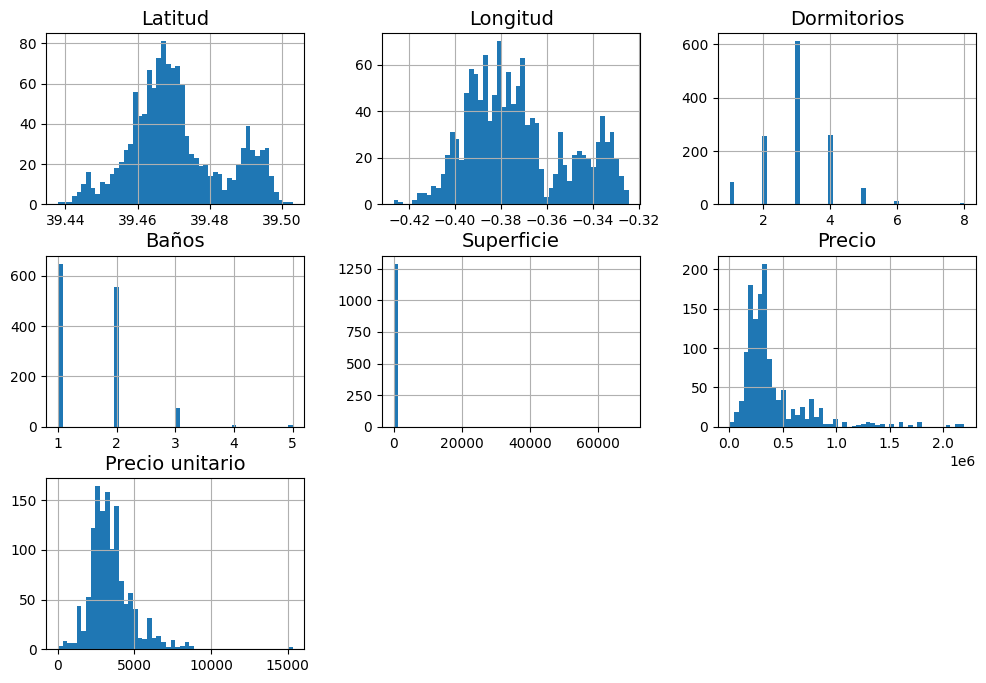

In [15]:
train_set.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

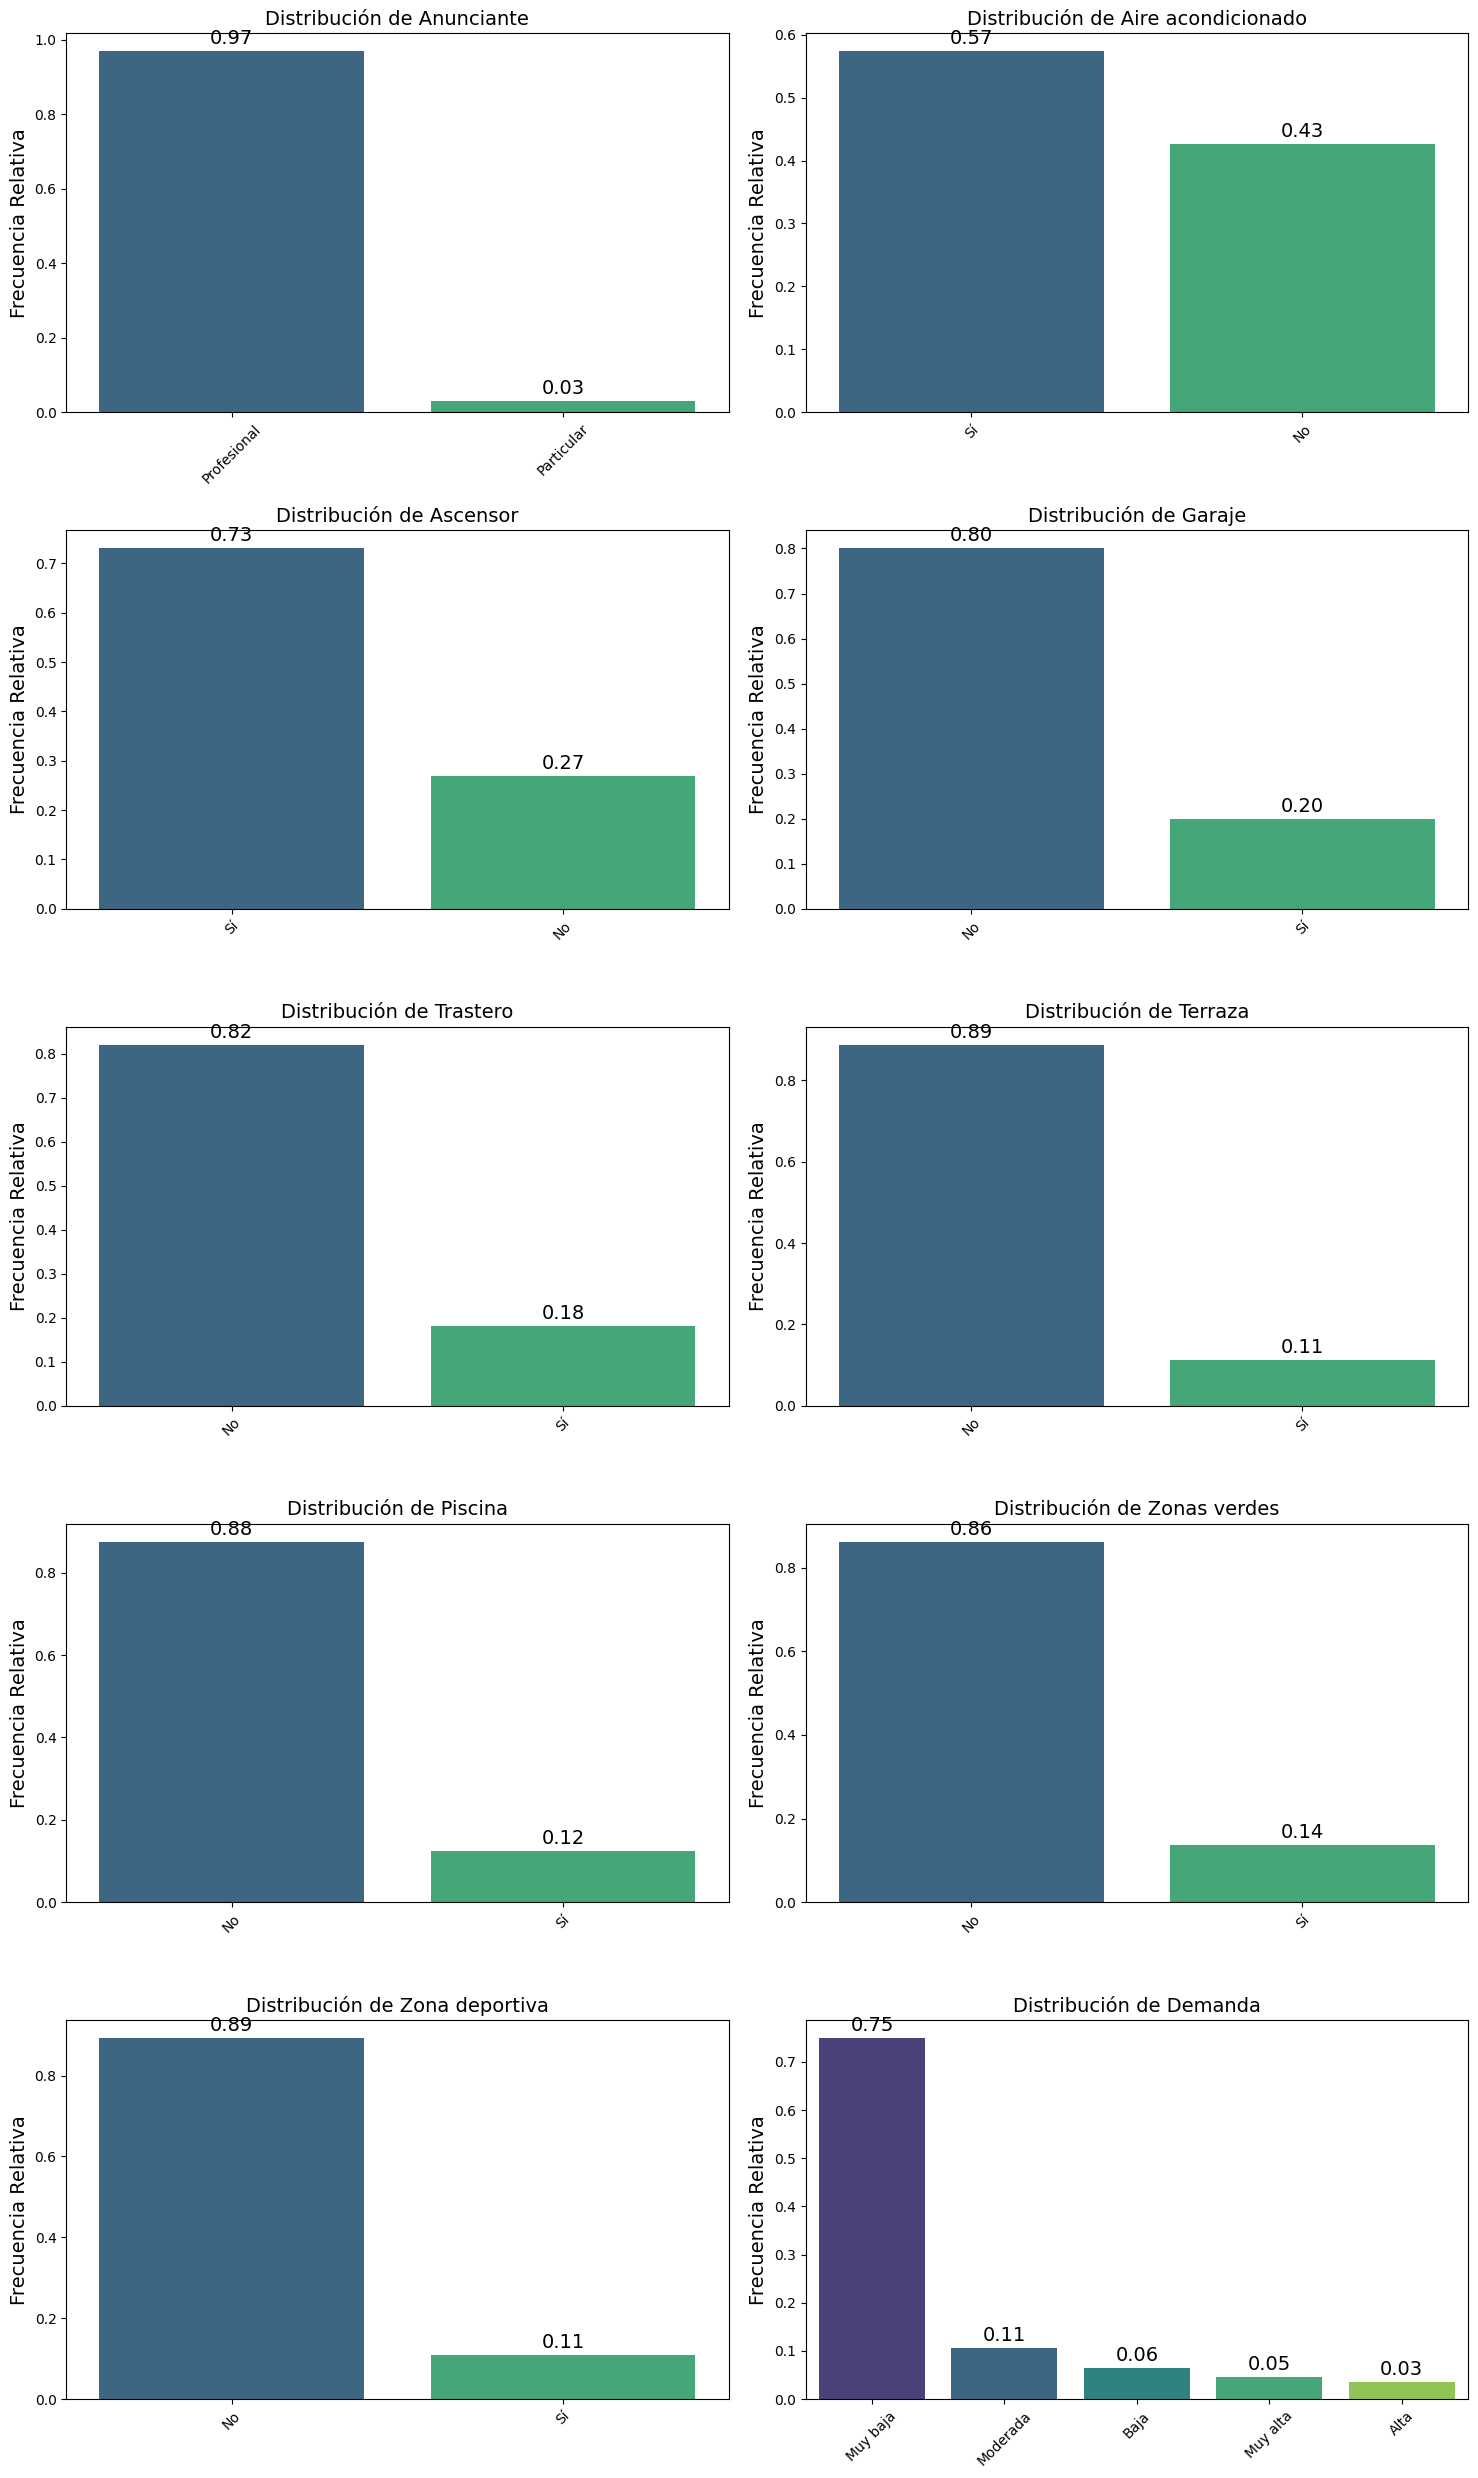

In [16]:
pinta_distribucion_categoricas(train_set, ["Anunciante","Aire acondicionado", "Ascensor", "Garaje", "Trastero", "Terraza", "Piscina", "Zonas verdes", "Zona deportiva", "Demanda"], relativa= True, mostrar_valores= True)

Analisis Bivariante / Multivariante

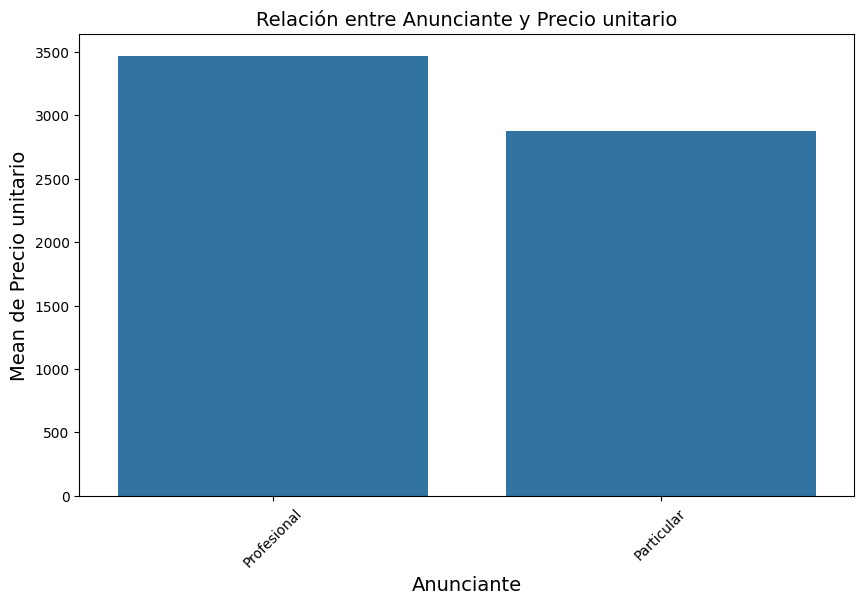

In [17]:
plot_categorical_numerical_relationship(train_set, categorical_col= "Anunciante", numerical_col="Precio unitario")

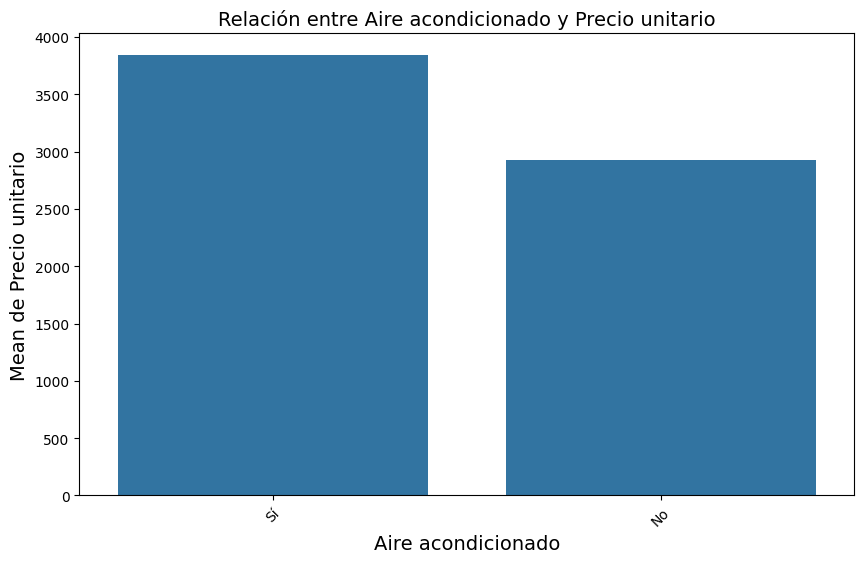

In [18]:
plot_categorical_numerical_relationship(train_set, categorical_col= "Aire acondicionado", numerical_col="Precio unitario")

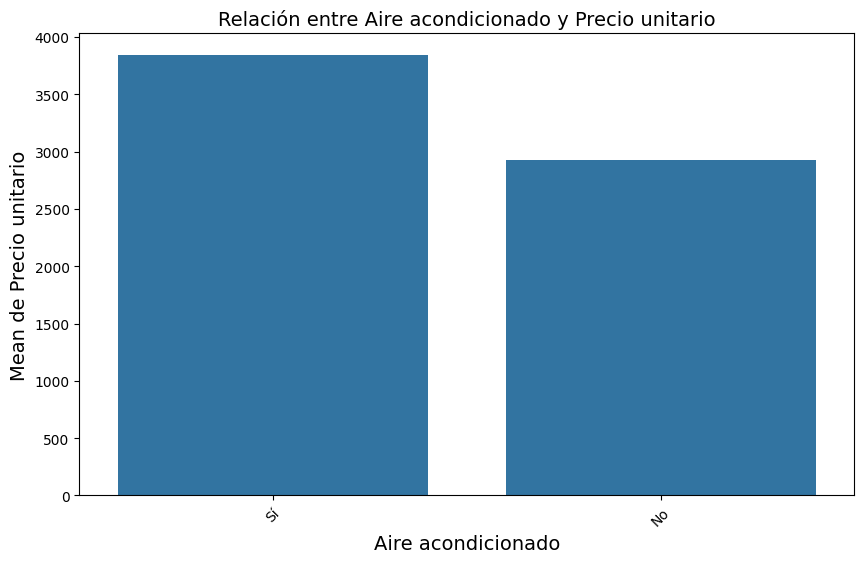

In [19]:
plot_categorical_numerical_relationship(train_set, categorical_col= "Aire acondicionado", numerical_col="Precio unitario")

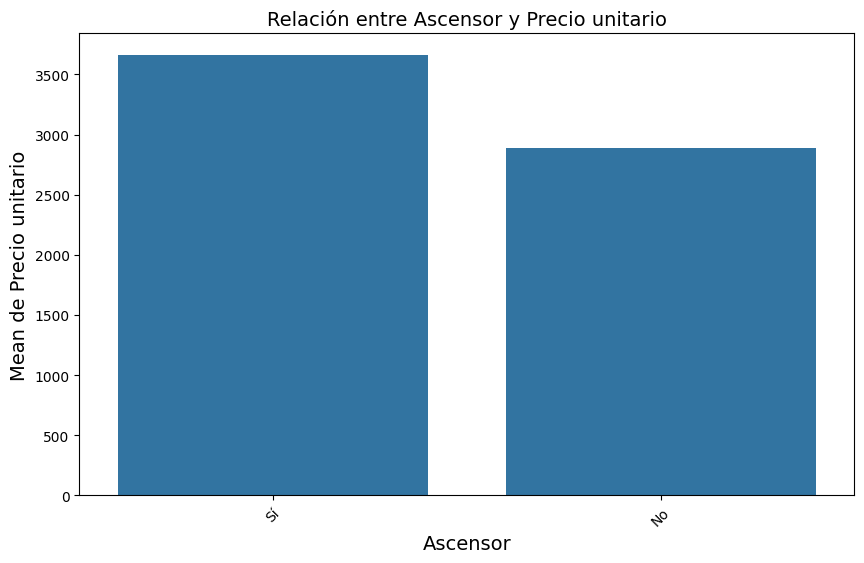

In [20]:
plot_categorical_numerical_relationship(train_set, categorical_col= "Ascensor", numerical_col="Precio unitario")

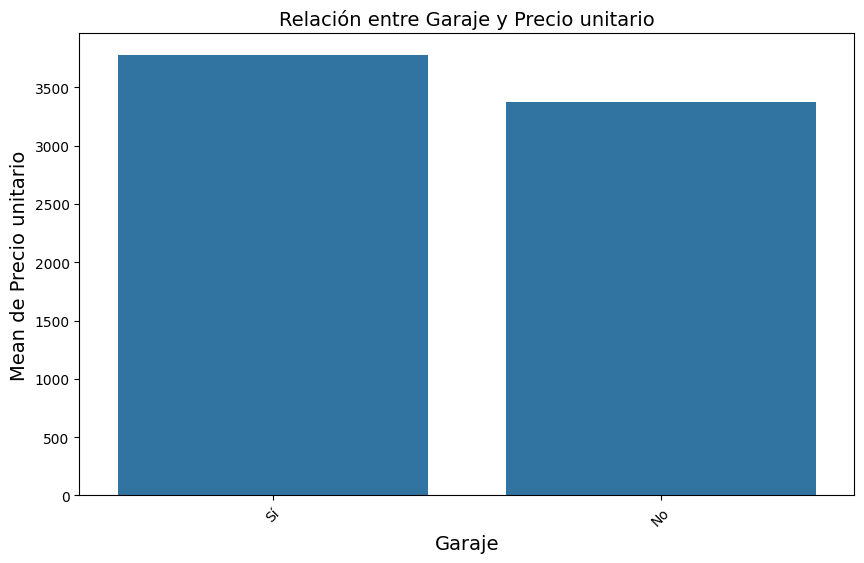

In [21]:
plot_categorical_numerical_relationship(train_set, categorical_col= "Garaje", numerical_col="Precio unitario")

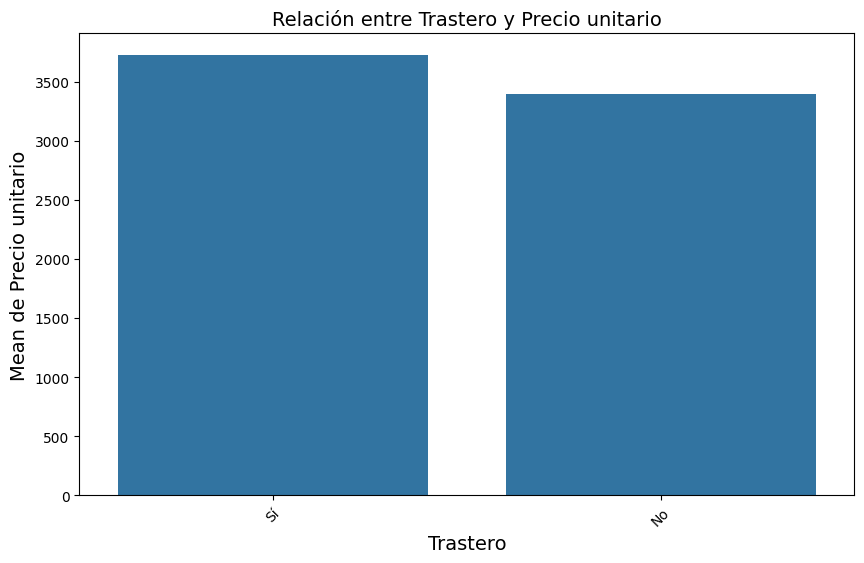

In [22]:
plot_categorical_numerical_relationship(train_set, categorical_col= "Trastero", numerical_col="Precio unitario")

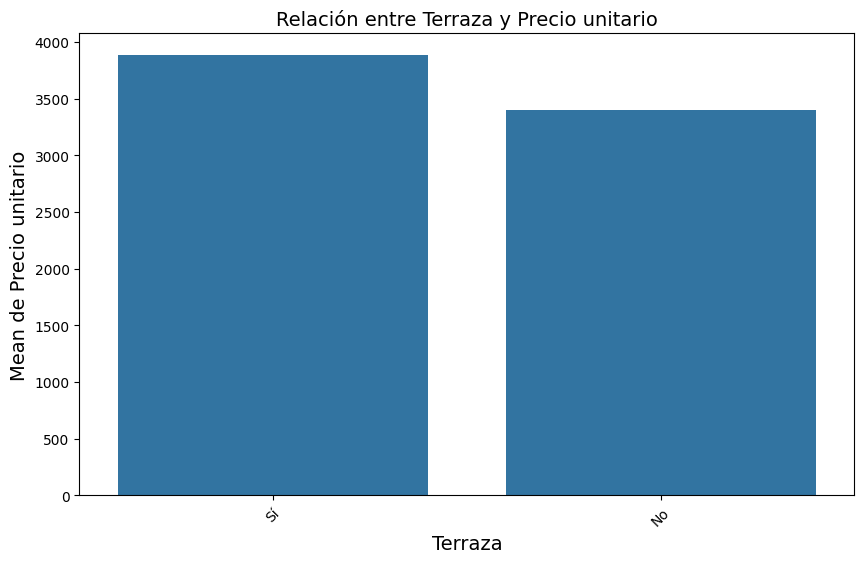

In [23]:
plot_categorical_numerical_relationship(train_set, categorical_col= "Terraza", numerical_col="Precio unitario")

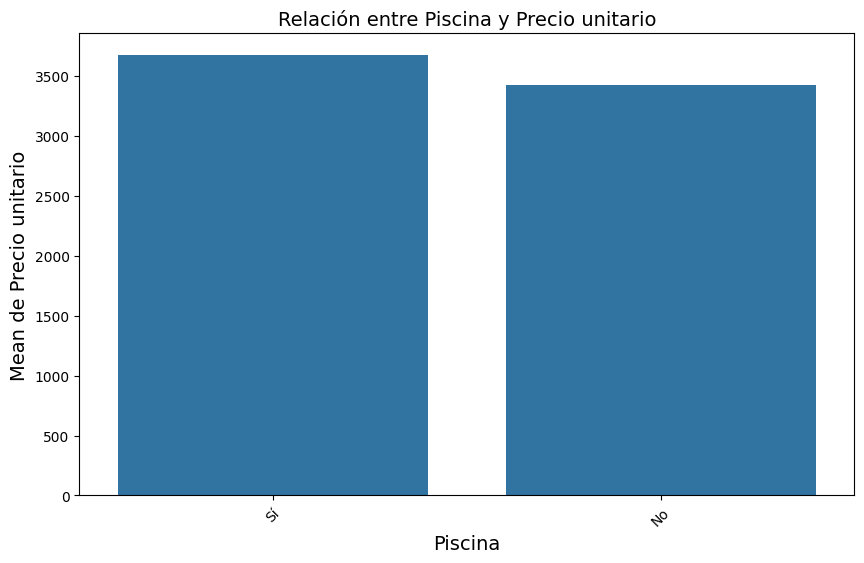

In [24]:
plot_categorical_numerical_relationship(train_set, categorical_col= "Piscina", numerical_col="Precio unitario")

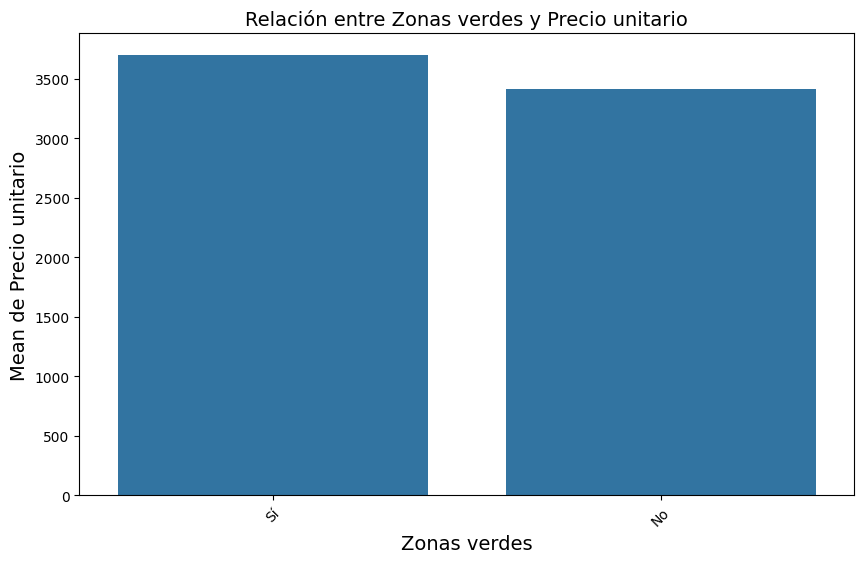

In [25]:
plot_categorical_numerical_relationship(train_set, categorical_col= "Zonas verdes", numerical_col="Precio unitario")

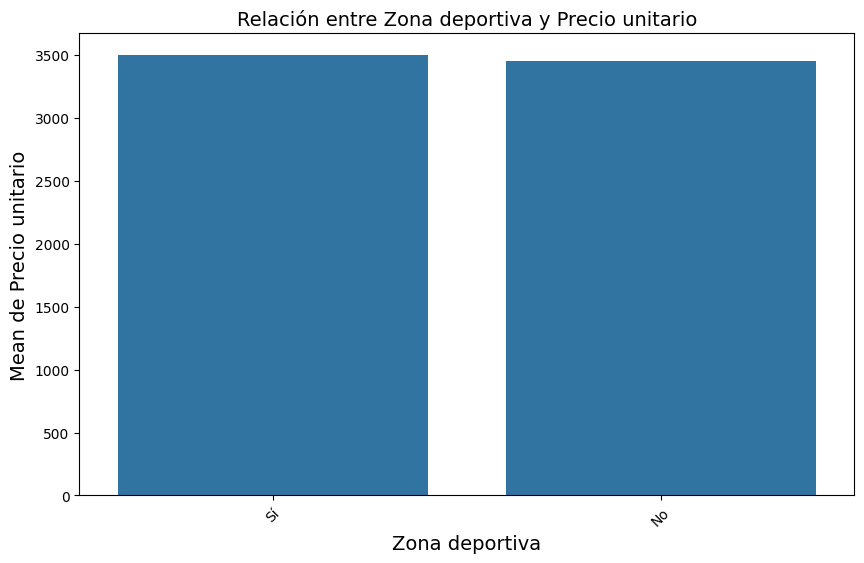

In [26]:
plot_categorical_numerical_relationship(train_set, categorical_col= "Zona deportiva", numerical_col="Precio unitario")

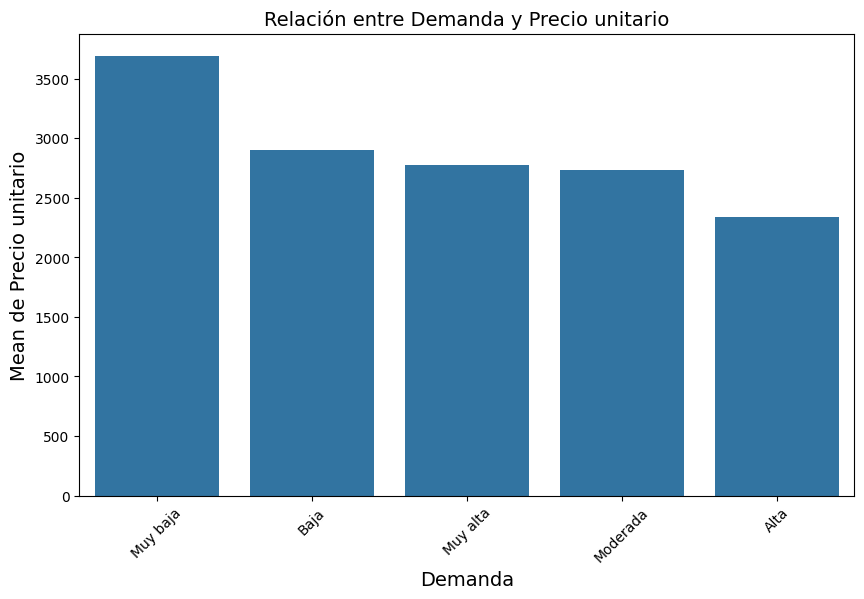

In [27]:
plot_categorical_numerical_relationship(train_set, categorical_col= "Demanda", numerical_col="Precio unitario")

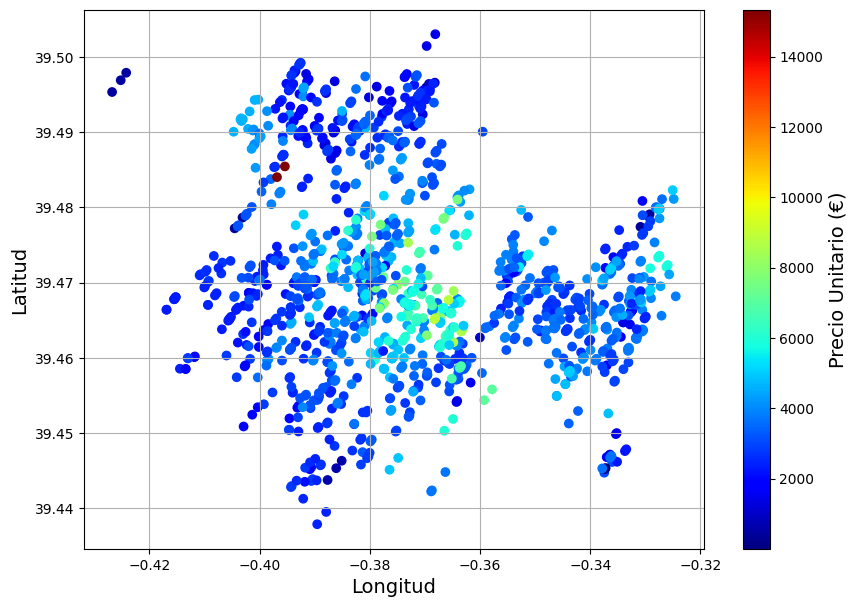

In [28]:
plt.figure(figsize=(10,7))
plt.scatter(train_set["Longitud"], train_set["Latitud"], c = train_set["Precio unitario"], cmap = "jet")
plt.grid()
plt.xlabel("Longitud")
plt.ylabel("Latitud")
cbar = plt.colorbar(label = "Precio Unitario (€)")

Variables numericas y target

In [29]:
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix["Precio unitario"].sort_values(ascending = False)

Precio unitario    1.000000
Precio             0.629279
Baños              0.322593
Longitud           0.111243
Dormitorios        0.028704
Superficie        -0.091902
Latitud           -0.117651
Name: Precio unitario, dtype: float64

In [30]:
columnas = corr_matrix["Precio unitario"][corr_matrix["Precio unitario"] > 0.07].index.to_list()

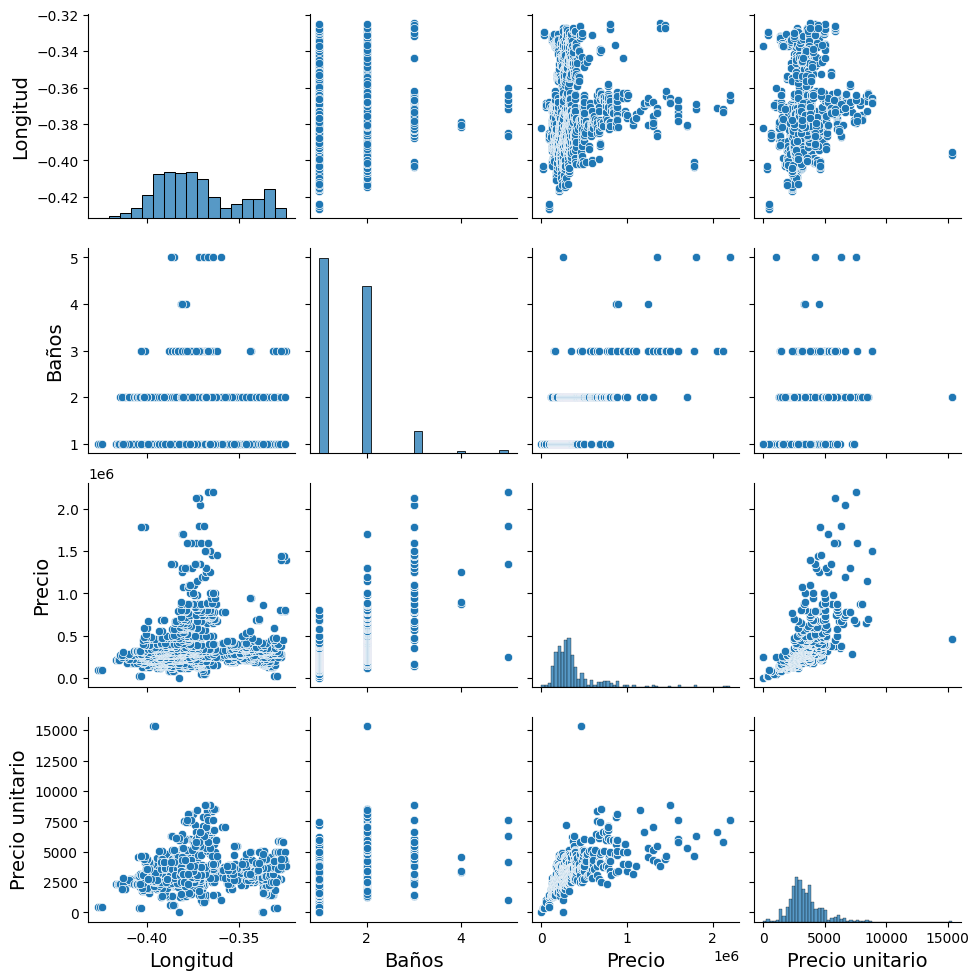

In [31]:
sns.pairplot(train_set[columnas]);

In [32]:
corr_matrix = train_set.corr(numeric_only=True)
corr_matrix["Precio unitario"].sort_values(ascending=False)

Precio unitario    1.000000
Precio             0.629279
Baños              0.322593
Longitud           0.111243
Dormitorios        0.028704
Superficie        -0.091902
Latitud           -0.117651
Name: Precio unitario, dtype: float64

Tratamiento features categoricas

In [33]:
train_set

,Fuente,Distrito,Barrio,Latitud,Longitud,Anunciante,Aire acondicionado,Ascensor,Garaje,Trastero,...,Piscina,Zonas verdes,Zona deportiva,Dormitorios,Baños,Superficie,Precio,Precio unitario,Demanda,Referencia_interna
737,habitaclia,Ciutat Vella,El Pilar,39.471778,-0.382368,Profesional,No,Sí,Sí,No,...,No,No,No,2.0,1.0,82,1200,14,Muy baja,39.4717781113-0.3823677887
1752,Fotocasa,Campanar,Sant Pau - Zona Palau de Congresos - Nou Campanar,39.477222,-0.404524,Particular,No,No,No,No,...,No,No,No,3.0,1.0,60,20000,333,Moderada,39.4772224986-0.4045243014
1750,milanuncios,Campanar,Sant Pau - Zona Palau de Congresos - Nou Campanar,39.478652,-0.403095,Particular,No,No,No,No,...,No,No,No,3.0,1.0,60,20000,333,Alta,39.4786516-0.4030952
546,habitaclia,Poblats Marítims,La Malva-rosa,39.479091,-0.329204,Profesional,No,No,No,No,...,No,No,No,3.0,1.0,81,30000,370,Alta,39.4790908581-0.3292035719
542,milanuncios,Poblats Marítims,La Malva-rosa,39.477421,-0.330873,Profesional,No,No,No,No,...,No,No,No,3.0,1.0,81,30000,370,Muy alta,39.4774213323-0.3308730977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,habitaclia,L'Eixample,El Pla del Remei,39.469001,-0.371898,Profesional,Sí,Sí,No,No,...,No,No,No,4.0,3.0,366,2125000,5806,Muy baja,39.4690008581-0.3718981419
921,milanuncios,L'Eixample,El Pla del Remei,39.467331,-0.373568,Profesional,Sí,Sí,No,No,...,No,No,No,4.0,3.0,366,2125000,5806,Muy baja,39.4673313323-0.3735676677
940,Fotocasa,El Pla del Real,Jaume Roig,39.478611,-0.366509,Profesional,No,No,Sí,No,...,No,No,No,5.0,5.0,290,2200000,7586,Muy baja,39.4786108986-0.3665091014
844,milanuncios,El Pla del Real,Jaume Roig,39.478471,-0.366649,Profesional,No,No,No,No,...,No,No,No,5.0,5.0,290,2200000,7586,Muy baja,39.4784713323-0.3666486677


In [34]:
pd.get_dummies(train_set, columns=["Fuente", "Distrito", "Barrio", "Anunciante", "Aire acondicionado", "Ascensor", "Garaje", "Trastero", "Terraza", "Piscina", "Zonas verdes", "Zona deportiva","Demanda"]).head()

,Latitud,Longitud,Dormitorios,Baños,Superficie,Precio,Precio unitario,Referencia_interna,Fuente_Fotocasa,Fuente_habitaclia,...,Piscina_Sí,Zonas verdes_No,Zonas verdes_Sí,Zona deportiva_No,Zona deportiva_Sí,Demanda_Alta,Demanda_Baja,Demanda_Moderada,Demanda_Muy alta,Demanda_Muy baja
737,39.471778,-0.382368,2.0,1.0,82,1200,14,39.4717781113-0.3823677887,False,True,...,False,True,False,True,False,False,False,False,False,True
1752,39.477222,-0.404524,3.0,1.0,60,20000,333,39.4772224986-0.4045243014,True,False,...,False,True,False,True,False,False,False,True,False,False
1750,39.478652,-0.403095,3.0,1.0,60,20000,333,39.4786516-0.4030952,False,False,...,False,True,False,True,False,True,False,False,False,False
546,39.479091,-0.329204,3.0,1.0,81,30000,370,39.4790908581-0.3292035719,False,True,...,False,True,False,True,False,True,False,False,False,False
542,39.477421,-0.330873,3.0,1.0,81,30000,370,39.4774213323-0.3308730977,False,False,...,False,True,False,True,False,False,False,False,True,False


In [35]:
pd.get_dummies(train_set, columns=["Fuente", "Distrito", "Barrio", "Anunciante", "Aire acondicionado", "Ascensor", "Garaje", "Trastero", "Terraza", "Piscina", "Zonas verdes", "Zona deportiva","Demanda"], dtype= int).head()

,Latitud,Longitud,Dormitorios,Baños,Superficie,Precio,Precio unitario,Referencia_interna,Fuente_Fotocasa,Fuente_habitaclia,...,Piscina_Sí,Zonas verdes_No,Zonas verdes_Sí,Zona deportiva_No,Zona deportiva_Sí,Demanda_Alta,Demanda_Baja,Demanda_Moderada,Demanda_Muy alta,Demanda_Muy baja
737,39.471778,-0.382368,2.0,1.0,82,1200,14,39.4717781113-0.3823677887,0,1,...,0,1,0,1,0,0,0,0,0,1
1752,39.477222,-0.404524,3.0,1.0,60,20000,333,39.4772224986-0.4045243014,1,0,...,0,1,0,1,0,0,0,1,0,0
1750,39.478652,-0.403095,3.0,1.0,60,20000,333,39.4786516-0.4030952,0,0,...,0,1,0,1,0,1,0,0,0,0
546,39.479091,-0.329204,3.0,1.0,81,30000,370,39.4790908581-0.3292035719,0,1,...,0,1,0,1,0,1,0,0,0,0
542,39.477421,-0.330873,3.0,1.0,81,30000,370,39.4774213323-0.3308730977,0,0,...,0,1,0,1,0,0,0,0,1,0


In [36]:
train_set_bck = train_set.copy()
train_set = pd.get_dummies(train_set, columns = ["Fuente", "Distrito", "Barrio", "Anunciante", "Aire acondicionado", "Ascensor", "Garaje", "Trastero", "Terraza", "Piscina", "Zonas verdes", "Zona deportiva","Demanda"], dtype = int)

Tratamiento features numericas: Escalar

In [37]:
from sklearn.preprocessing import MinMaxScaler

features_num = ["Latitud","Longitud","Dormitorios","Baños","Superficie"]
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
resultado_min_max = pd.DataFrame(min_max_scaler.fit_transform(train_set[features_num]), columns= features_num)
resultado_min_max

# Aplicar el scaler al train_set
train_set[features_num] = min_max_scaler.fit_transform(train_set[features_num])
print("Scaler aplicado correctamente al train_set")

Scaler aplicado correctamente al train_set


In [38]:
resultado_min_max.describe()

,Latitud,Longitud,Dormitorios,Baños,Superficie
count,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000
mean,0.007321,0.061807,-0.423477,-0.706977,-0.994578
std,0.393794,0.430149,0.292677,0.342533,0.078644
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.244018,-0.270176,-0.714286,-1.000000,-0.998550
50%,-0.059612,-0.014497,-0.428571,-1.000000,-0.998086
75%,0.219092,0.396735,-0.142857,-0.500000,-0.997347
max,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Latitud'}>,
        <Axes: title={'center': 'Longitud'}>],
       [<Axes: title={'center': 'Dormitorios'}>,
        <Axes: title={'center': 'Baños'}>],
       [<Axes: title={'center': 'Superficie'}>, <Axes: >]], dtype=object)

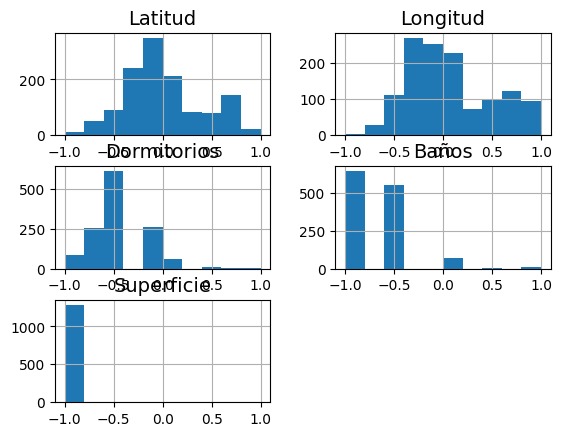

In [39]:
f_num = ["Latitud","Longitud","Dormitorios","Baños","Superficie"]
train_set[f_num].hist()

Modelado

In [40]:
target = "Precio unitario"
cols_ohe = [c for c in train_set.columns if any(
    c.startswith(p) for p in ["Fuente_", "Distrito_", "Barrio_", "Anunciante_", 
    "Aire acondicionado_", "Ascensor_", "Garaje_", "Trastero_", 
    "Terraza_", "Piscina_", "Zonas verdes_", "Zona deportiva_", "Demanda_"]
)]

features = f_num + cols_ohe
features

['Latitud',
 'Longitud',
 'Dormitorios',
 'Baños',
 'Superficie',
 'Fuente_Fotocasa',
 'Fuente_habitaclia',
 'Fuente_milanuncios',
 'Distrito_Algirós',
 'Distrito_Benicalap',
 'Distrito_Benimaclet',
 'Distrito_Camins al Grau',
 'Distrito_Campanar',
 'Distrito_Ciutat Vella',
 'Distrito_El Pla del Real',
 'Distrito_Extramurs',
 'Distrito_Jesús',
 "Distrito_L'Eixample",
 "Distrito_L'Olivereta",
 'Distrito_La Saïdia',
 'Distrito_Patraix',
 'Distrito_Poblats Marítims',
 'Distrito_Quatre Carreres',
 'Distrito_Rascanya',
 'Barrio_Aiora',
 'Barrio_Albors',
 'Barrio_Arrancapins',
 'Barrio_Barrio de Benicalap',
 'Barrio_Barrio de Benimaclet',
 'Barrio_Barrio de Patraix',
 'Barrio_Beteró',
 'Barrio_Campanar - La Fe',
 'Barrio_Camí Fondo - Zona Baleares - Canarias',
 'Barrio_Camí Real',
 'Barrio_Camí de Vera',
 'Barrio_Ciutat Fallera',
 'Barrio_Ciutat Jardí',
 'Barrio_Ciutat de les Ciències i de les Arts - Justicia',
 'Barrio_El Cabanyal - El Canyamelar',
 'Barrio_El Carme',
 'Barrio_El Grau',
 'B

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
# Regresor Lineal

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# Arboles de decisión para Regresión 
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42) # Necesita una inicialización aleatoria y la semilla permite que siempre sea la misma

In [43]:
# primero separamos la variable target del dataset de train y además solo nos quedamos con las features:


X = train_set[features].copy()
y= train_set[target]

In [44]:
lin_reg.fit(X,y)
tree_reg.fit(X,y)

DecisionTreeRegressor(random_state=42)

In [45]:
# Primero las predicciones
train_pred_lin = lin_reg.predict(X)

train_pred_tree = tree_reg.predict(X)

In [46]:
train_pred_lin

array([3441.5 , 2371.5 , 2083.25, ..., 5050.5 , 4757.5 , 4883.  ],
      shape=(1290,))

In [47]:
mse_lin = mean_squared_error(y, train_pred_lin, squared=False) # En realidad damos la raíz cuadrada del error cuadrático medio
# que está en las mismas unidades que el target
print(mse_lin)

917.427027176439


c:\Users\priet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [48]:
mse_tree = mean_squared_error(y, train_pred_tree, squared= False)
print(mse_tree)

0.0


c:\Users\priet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluacion

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
#### Error contra todo el train:
train_pred_lin = lin_reg.predict(X)
mse_lin = mean_squared_error(y, train_pred_lin, squared=False) # En realidad damos la raíz cuadrada del error cuadrático medio
# que está en las mismas unidades que el target
print(mse_lin)

917.427027176439


c:\Users\priet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [51]:
lin_rmses = -cross_val_score(lin_reg, X, y,
                              scoring="neg_root_mean_squared_error", cv=10) # k = 10
pd.Series(lin_rmses).describe()

count    1.000000e+01
mean     2.479086e+13
std      4.783155e+13
min      6.241907e+02
25%      1.373717e+03
50%      9.746609e+12
75%      2.266089e+13
max      1.575780e+14
dtype: float64

In [52]:
#### Error contra todo el train:
train_pred_tree = tree_reg.predict(X)
mse_tree = mean_squared_error(y, train_pred_tree, squared=False) # En realidad damos la raíz cuadrada del error cuadrático medio
# que está en las mismas unidades que el target
print(mse_tree)

0.0


c:\Users\priet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [53]:
tree_rmses = -cross_val_score(tree_reg, X, y,
                              scoring="neg_root_mean_squared_error", cv=10) # k = 10
pd.Series(tree_rmses).describe()

count      10.000000
mean     1488.113512
std       475.945247
min       992.769008
25%      1206.741652
50%      1259.628685
75%      1729.207778
max      2404.246426
dtype: float64

Evaluacion contra el test

In [55]:
# Preprocesar test set igual que train
columnas_a_eliminar = [
    "Tipologia", "Titulo", "Provincia", "Municipio", "C.P.",
    "Planta", "Empresa", "Imagen", "URL", "Telefono",
    "Email", "Posible agencia", "Referencia", "Operacion", "Fecha de creacion",
    "Comentarios", "Descartado", "Estado", "Ranking", "Dias", "Conservacion"
]
test_set = test_set.drop(columns=columnas_a_eliminar, errors="ignore")
test_set = test_set.dropna(subset=["Barrio", "Baños", "Dormitorios"])

cat_cols = ["Fuente", "Distrito", "Barrio", "Anunciante", "Aire acondicionado",
            "Ascensor", "Garaje", "Trastero", "Terraza", "Piscina",
            "Zonas verdes", "Zona deportiva", "Demanda"]
test_set = pd.get_dummies(test_set, columns=cat_cols, dtype=int)

# Alinear columnas con train (barrios nuevos -> 0)
X_test = test_set.reindex(columns=features, fill_value=0)
y_test = test_set[target]

# Escalar con el scaler ya ajustado en train (sin re-fit)
X_test[f_num] = min_max_scaler.transform(X_test[f_num])
print("Test set listo:", X_test.shape)

Test set listo: (362, 114)


In [56]:
# Predicciones y metricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

test_pred_lin  = lin_reg.predict(X_test)
test_pred_tree = tree_reg.predict(X_test)

def evaluar_modelo(nombre, y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    sep  = "=" * 45
    print(sep)
    print("  " + nombre)
    print(sep)
    print("  RMSE : " + str(round(rmse)) + " euros/m2")
    print("  MAE  : " + str(round(mae))  + " euros/m2")
    print("  R2   : " + str(round(r2, 3)) + "  (1.0 = perfecto)")

evaluar_modelo("Regresion Lineal  - TEST", y_test, test_pred_lin)
evaluar_modelo("Arbol de Decision - TEST", y_test, test_pred_tree)

  Regresion Lineal  - TEST
  RMSE : 1031 euros/m2
  MAE  : 637 euros/m2
  R2   : 0.534  (1.0 = perfecto)
  Arbol de Decision - TEST
  RMSE : 837 euros/m2
  MAE  : 389 euros/m2
  R2   : 0.693  (1.0 = perfecto)


c:\Users\priet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\priet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [57]:
# Comparativa Train vs Test
rmse_lin_train  = mean_squared_error(y, lin_reg.predict(X),  squared=False)
rmse_tree_train = mean_squared_error(y, tree_reg.predict(X), squared=False)
rmse_lin_test   = mean_squared_error(y_test, test_pred_lin,  squared=False)
rmse_tree_test  = mean_squared_error(y_test, test_pred_tree, squared=False)

print("Modelo                    Train       Test    Diferencia")
print("-" * 60)
dif_lin  = round(rmse_lin_test  - rmse_lin_train)
dif_tree = round(rmse_tree_test - rmse_tree_train)
print("Regresion Lineal     ", round(rmse_lin_train),  "  ", round(rmse_lin_test),  "  +" + str(dif_lin))
print("Arbol de Decision    ", round(rmse_tree_train), "  ", round(rmse_tree_test), "  +" + str(dif_tree))
print("")
print("Si el arbol tiene error~0 en train y alto en test -> overfitting")

Modelo                    Train       Test    Diferencia
------------------------------------------------------------
Regresion Lineal      917    1031   +114
Arbol de Decision     0    837   +837

Si el arbol tiene error~0 en train y alto en test -> overfitting


c:\Users\priet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\priet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\priet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\priet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarnin

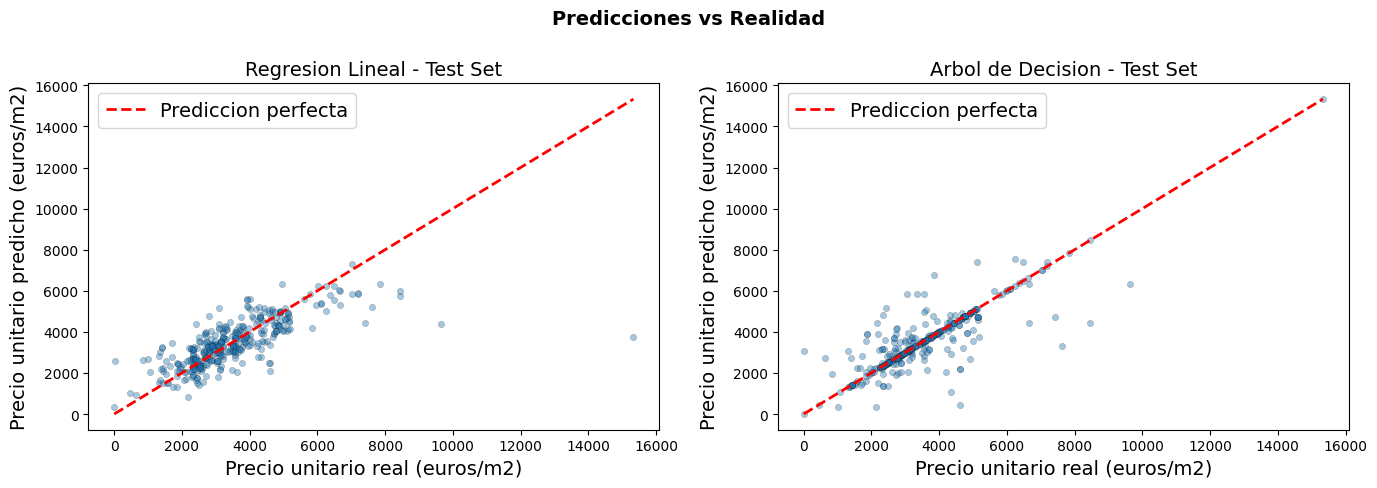

In [58]:
# Grafico: predicciones vs realidad
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

modelos = [(test_pred_lin, "Regresion Lineal"), (test_pred_tree, "Arbol de Decision")]
for ax, (preds, nombre) in zip(axes, modelos):
    ax.scatter(y_test, preds, alpha=0.4, edgecolors="k", linewidths=0.3, s=20)
    lims = [min(y_test.min(), preds.min()), max(y_test.max(), preds.max())]
    ax.plot(lims, lims, "r--", linewidth=2, label="Prediccion perfecta")
    ax.set_xlabel("Precio unitario real (euros/m2)")
    ax.set_ylabel("Precio unitario predicho (euros/m2)")
    ax.set_title(nombre + " - Test Set")
    ax.legend()

plt.suptitle("Predicciones vs Realidad", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()